# KIKI

In [1]:
# import dependencies
import requests
import json
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import linregress

# File to Load
drug_deaths_to_load = Path('opioid_death_counts.csv')

# Import Bureau of Labor Statistics API Key
from api_keys import census_api_key

# Replace 'YOUR_API_KEY' with your actual census API key
API_KEY = census_api_key
state = 'state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56'

income_2022_url = f'https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B19013)&for={state}&key={census_api_key}'
income_2021_url = f'https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B19013)&for={state}&key={census_api_key}'
income_2019_url = f'https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B19013)&for={state}&key={census_api_key}'
income_2018_url = f'https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B19013)&for={state}&key={census_api_key}'
income_2017_url = f'https://api.census.gov/data/2017/acs/acs1?get=NAME,group(B19013)&for={state}&key={census_api_key}'

print(f'2022 Census Income URL: {income_2022_url}\n')
print(f'2021 Census Income URL: {income_2021_url}\n')
print(f'2019 Census Income URL: {income_2019_url}\n')
print(f'2018 Census Income URL: {income_2018_url}\n')
print(f'2017 Census Income URL: {income_2017_url}\n')

2022 Census Income URL: https://api.census.gov/data/2022/acs/acs1?get=NAME,group(B19013)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=32d425d86bd974c0af9ec8431fb0cab816cbe005

2021 Census Income URL: https://api.census.gov/data/2021/acs/acs1?get=NAME,group(B19013)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=32d425d86bd974c0af9ec8431fb0cab816cbe005

2019 Census Income URL: https://api.census.gov/data/2019/acs/acs1?get=NAME,group(B19013)&for=state:01,02,04,05,06,08,09,10,11,12,13,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,44,45,46,47,48,49,50,51,53,54,55,56&key=32d425d86bd974c0af9ec8431fb0cab816cbe005

2018 Census Income URL: https://api.census.gov/data/2018/acs/acs1?get=NAME,group(B19013)&for=state:01,02,0

In [2]:
income_2017_json = requests.get(income_2017_url).json()

income_2017_df = pd.DataFrame(requests.get(income_2017_url).json()[1:], columns=requests.get(income_2017_url).json()[0])

income_2017_df_cleaned = income_2017_df.rename(columns={
    'NAME': 'State Name',
    'GEO_ID': 'Geo ID',
    'state': 'State ID',
    'B19013_001E': 'Median Household Income (in Inflation-Adjusted Dollars)',
})

income_2017_df_cleaned ['Year'] = 2017

income_2017_df_final = income_2017_df_cleaned[[
    'Year',
    'State Name',
    'Geo ID',
    'State ID',
    'Median Household Income (in Inflation-Adjusted Dollars)',
]]

income_2017_df_final = income_2017_df_final.loc[:, ~income_2017_df_final.columns.duplicated()]

income_2017_df_final

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2017,Mississippi,0400000US28,28,43529
1,2017,Missouri,0400000US29,29,53578
2,2017,Montana,0400000US30,30,53386
3,2017,Nebraska,0400000US31,31,59970
4,2017,Nevada,0400000US32,32,58003
5,2017,New Hampshire,0400000US33,33,73381
6,2017,New Jersey,0400000US34,34,80088
7,2017,New Mexico,0400000US35,35,46744
8,2017,New York,0400000US36,36,64894
9,2017,North Carolina,0400000US37,37,52752


In [3]:
income_2018_json = requests.get(income_2018_url).json()

income_2018_df = pd.DataFrame(requests.get(income_2018_url).json()[1:], columns=requests.get(income_2018_url).json()[0])

income_2018_df_cleaned = income_2018_df.rename(columns={
    'NAME': 'State Name',
    'GEO_ID': 'Geo ID',
    'state': 'State ID',
    'B19013_001E': 'Median Household Income (in Inflation-Adjusted Dollars)',
})

income_2018_df_cleaned ['Year'] = 2018

income_2018_df_final = income_2018_df_cleaned[[
    'Year',
    'State Name',
    'Geo ID',
    'State ID',
    'Median Household Income (in Inflation-Adjusted Dollars)',
]]

income_2018_df_final = income_2018_df_final.loc[:, ~income_2018_df_final.columns.duplicated()]

income_2018_df_final

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2018,Wisconsin,0400000US55,55,60773
1,2018,Wyoming,0400000US56,56,61584
2,2018,Mississippi,0400000US28,28,44717
3,2018,Missouri,0400000US29,29,54478
4,2018,Montana,0400000US30,30,55328
5,2018,Nebraska,0400000US31,31,59566
6,2018,Nevada,0400000US32,32,58646
7,2018,New Hampshire,0400000US33,33,74991
8,2018,New Jersey,0400000US34,34,81740
9,2018,New Mexico,0400000US35,35,47169


In [4]:
income_2019_json = requests.get(income_2019_url).json()

income_2019_df = pd.DataFrame(requests.get(income_2019_url).json()[1:], columns=requests.get(income_2019_url).json()[0])

income_2019_df_cleaned = income_2019_df.rename(columns={
    'NAME': 'State Name',
    'GEO_ID': 'Geo ID',
    'state': 'State ID',
    'B19013_001E': 'Median Household Income (in Inflation-Adjusted Dollars)',
})

income_2019_df_cleaned ['Year'] = 2019

income_2019_df_final = income_2019_df_cleaned[[
    'Year',
    'State Name',
    'Geo ID',
    'State ID',
    'Median Household Income (in Inflation-Adjusted Dollars)',
]]

income_2019_df_final = income_2019_df_final.loc[:, ~income_2019_df_final.columns.duplicated()]

income_2019_df_final

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2019,Mississippi,0400000US28,28,45792
1,2019,Missouri,0400000US29,29,57409
2,2019,Montana,0400000US30,30,57153
3,2019,Nebraska,0400000US31,31,63229
4,2019,Nevada,0400000US32,32,63276
5,2019,New Hampshire,0400000US33,33,77933
6,2019,New Jersey,0400000US34,34,85751
7,2019,New Mexico,0400000US35,35,51945
8,2019,New York,0400000US36,36,72108
9,2019,North Carolina,0400000US37,37,57341


In [5]:
income_2021_json = requests.get(income_2021_url).json()

income_2021_df = pd.DataFrame(requests.get(income_2021_url).json()[1:], columns=requests.get(income_2021_url).json()[0])

income_2021_df_cleaned = income_2021_df.rename(columns={
    'NAME': 'State Name',
    'GEO_ID': 'Geo ID',
    'state': 'State ID',
    'B19013_001E': 'Median Household Income (in Inflation-Adjusted Dollars)',
})

income_2021_df_cleaned ['Year'] = 2021

income_2021_df_final = income_2021_df_cleaned[[
    'Year',
    'State Name',
    'Geo ID',
    'State ID',
    'Median Household Income (in Inflation-Adjusted Dollars)',
]]

income_2021_df_final = income_2021_df_final.loc[:, ~income_2021_df_final.columns.duplicated()]

income_2021_df_final

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2021,Alabama,0400000US01,01,53913
1,2021,Arizona,0400000US04,04,69056
2,2021,Arkansas,0400000US05,05,52528
3,2021,California,0400000US06,06,84907
4,2021,Colorado,0400000US08,08,82254
5,2021,Connecticut,0400000US09,09,83771
6,2021,Delaware,0400000US10,10,71091
7,2021,District of Columbia,0400000US11,11,90088
8,2021,Florida,0400000US12,12,63062
9,2021,Georgia,0400000US13,13,66559


In [6]:
income_2022_json = requests.get(income_2022_url).json()

income_2022_df = pd.DataFrame(requests.get(income_2022_url).json()[1:], columns=requests.get(income_2022_url).json()[0])

income_2022_df_cleaned = income_2022_df.rename(columns={
    'NAME': 'State Name',
    'GEO_ID': 'Geo ID',
    'state': 'State ID',
    'B19013_001E': 'Median Household Income (in Inflation-Adjusted Dollars)',
})

income_2022_df_cleaned ['Year'] = 2022

income_2022_df_final = income_2022_df_cleaned[[
    'Year',
    'State Name',
    'Geo ID',
    'State ID',
    'Median Household Income (in Inflation-Adjusted Dollars)',
]]

income_2022_df_final = income_2022_df_final.loc[:, ~income_2022_df_final.columns.duplicated()]

income_2022_df_final

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2022,Alabama,0400000US01,01,59674
1,2022,Alaska,0400000US02,02,88121
2,2022,Arizona,0400000US04,04,74568
3,2022,Arkansas,0400000US05,05,55432
4,2022,California,0400000US06,06,91551
5,2022,Colorado,0400000US08,08,89302
6,2022,Connecticut,0400000US09,09,88429
7,2022,Delaware,0400000US10,10,82174
8,2022,District of Columbia,0400000US11,11,101027
9,2022,Florida,0400000US12,12,69303


In [7]:
combined_income_df = pd.concat([income_2022_df_final,
                                income_2021_df_final,
                                income_2019_df_final,
                                income_2018_df_final,
                                income_2017_df_final],
                               axis=0)

combined_income_df.reset_index(drop=True, inplace=True)

combined_income_df

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars)
0,2022,Alabama,0400000US01,01,59674
1,2022,Alaska,0400000US02,02,88121
2,2022,Arizona,0400000US04,04,74568
3,2022,Arkansas,0400000US05,05,55432
4,2022,California,0400000US06,06,91551
...,...,...,...,...,...
250,2017,Maine,0400000US23,23,56277
251,2017,Maryland,0400000US24,24,80776
252,2017,Massachusetts,0400000US25,25,77385
253,2017,Michigan,0400000US26,26,54909


In [8]:
# Read Drug Overdose Data File and store into Pandas DataFrames
opioid_csv = pd.read_csv(drug_deaths_to_load)
opioid_df = pd.DataFrame(opioid_csv)
opioid_df

,Year,State Name,Indicator,Total_Opioid_Deaths
0,2017,Alaska,"Opioids (T40.0-T40.4,T40.6)",100
1,2017,Arizona,"Opioids (T40.0-T40.4,T40.6)",936
2,2017,Connecticut,"Opioids (T40.0-T40.4,T40.6)",967
3,2017,District of Columbia,"Opioids (T40.0-T40.4,T40.6)",271
4,2017,Georgia,"Opioids (T40.0-T40.4,T40.6)",1003
...,...,...,...,...
193,2022,Virginia,"Opioids (T40.0-T40.4,T40.6)",2108
194,2022,Washington,"Opioids (T40.0-T40.4,T40.6)",2101
195,2022,West Virginia,"Opioids (T40.0-T40.4,T40.6)",1139
196,2022,Wisconsin,"Opioids (T40.0-T40.4,T40.6)",1421


In [9]:
# Merge Drug Overdose Dataframe and Income Dataframe
merged_opioid_income = pd.merge(combined_income_df, opioid_df, on=['Year', 'State Name'])
merged_opioid_income

,Year,State Name,Geo ID,State ID,Median Household Income (in Inflation-Adjusted Dollars),Indicator,Total_Opioid_Deaths
0,2022,Alabama,0400000US01,01,59674,"Opioids (T40.0-T40.4,T40.6)",1076
1,2022,Alaska,0400000US02,02,88121,"Opioids (T40.0-T40.4,T40.6)",185
2,2022,Arizona,0400000US04,04,74568,"Opioids (T40.0-T40.4,T40.6)",1965
3,2022,Arkansas,0400000US05,05,55432,"Opioids (T40.0-T40.4,T40.6)",359
4,2022,California,0400000US06,06,91551,"Opioids (T40.0-T40.4,T40.6)",7929
...,...,...,...,...,...,...,...
193,2017,Illinois,0400000US17,17,62992,"Opioids (T40.0-T40.4,T40.6)",2214
194,2017,Iowa,0400000US19,19,58570,"Opioids (T40.0-T40.4,T40.6)",206
195,2017,Maine,0400000US23,23,56277,"Opioids (T40.0-T40.4,T40.6)",348
196,2017,Maryland,0400000US24,24,80776,"Opioids (T40.0-T40.4,T40.6)",2037


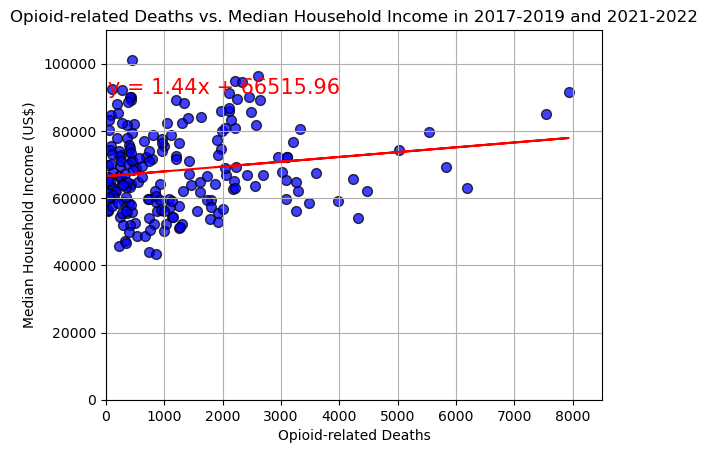

In [18]:
# Create a scatter plot and run regression
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

x_values = merged_opioid_income["Total_Opioid_Deaths"]
y_values = merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2017-2019 and 2021-2022")
plt.grid(True)

plt.show()

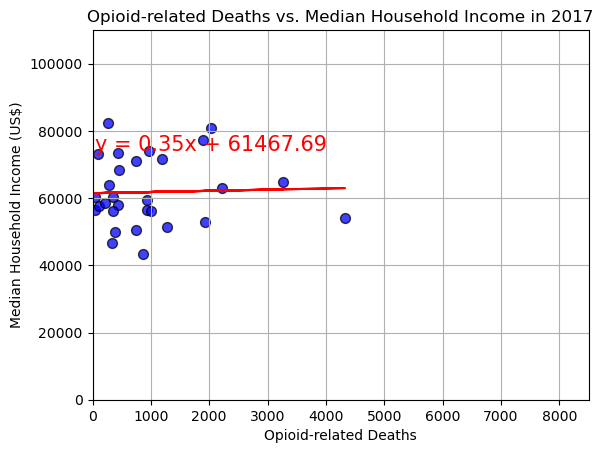

In [21]:
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

merged_opioid_income_2017 = merged_opioid_income[merged_opioid_income["Year"] == 2017]

x_values = merged_opioid_income_2017["Total_Opioid_Deaths"]
y_values = merged_opioid_income_2017["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2017")
plt.grid(True)

plt.show()

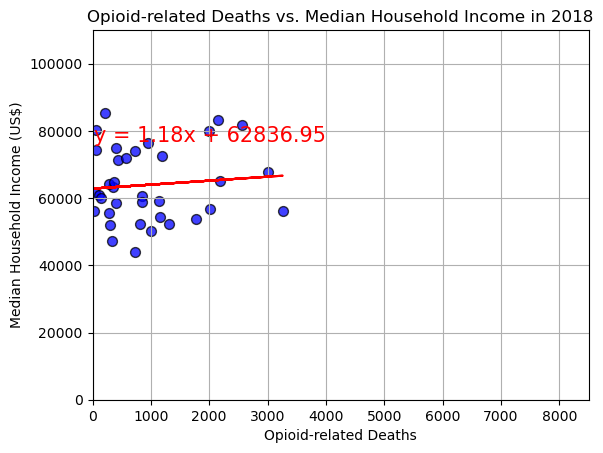

In [25]:
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

merged_opioid_income_2018 = merged_opioid_income[merged_opioid_income["Year"] == 2018]

x_values = merged_opioid_income_2018["Total_Opioid_Deaths"]
y_values = merged_opioid_income_2018["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2018")
plt.grid(True)

plt.show()

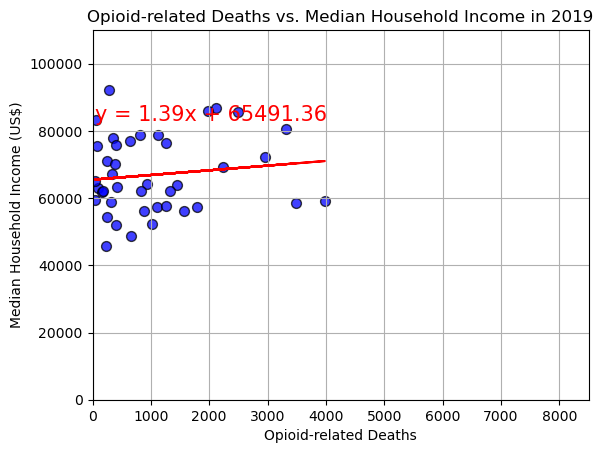

In [24]:
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

merged_opioid_income_2019 = merged_opioid_income[merged_opioid_income["Year"] == 2019]

x_values = merged_opioid_income_2019["Total_Opioid_Deaths"]
y_values = merged_opioid_income_2019["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2019")
plt.grid(True)

plt.show()

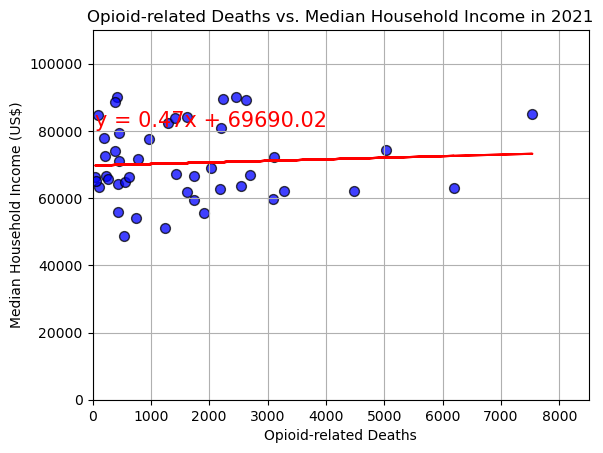

In [29]:
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

merged_opioid_income_2021 = merged_opioid_income[merged_opioid_income["Year"] == 2021]

x_values = merged_opioid_income_2021["Total_Opioid_Deaths"]
y_values = merged_opioid_income_2021["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2021")
plt.grid(True)

plt.show()

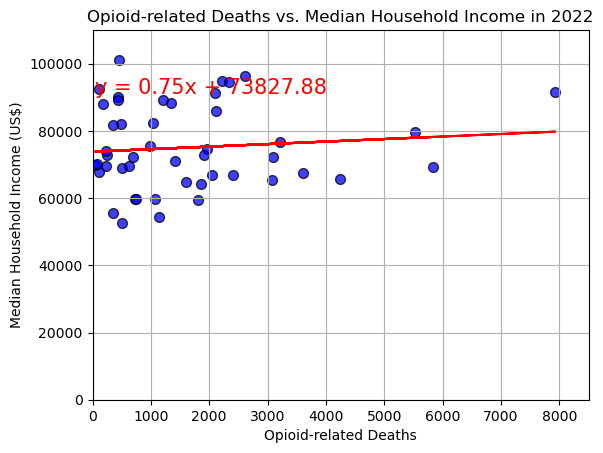

In [30]:
merged_opioid_income["Total_Opioid_Deaths"] = pd.to_numeric(merged_opioid_income["Total_Opioid_Deaths"], errors='coerce')
merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"] = pd.to_numeric(merged_opioid_income["Median Household Income (in Inflation-Adjusted Dollars)"], errors='coerce')
merged_opioid_income = merged_opioid_income.dropna(subset=["Total_Opioid_Deaths", "Median Household Income (in Inflation-Adjusted Dollars)"])

merged_opioid_income_2022 = merged_opioid_income[merged_opioid_income["Year"] == 2022]

x_values = merged_opioid_income_2022["Total_Opioid_Deaths"]
y_values = merged_opioid_income_2022["Median Household Income (in Inflation-Adjusted Dollars)"]

plt.scatter(x_values, y_values,
            marker="o",
            facecolors="blue",
            edgecolors="black",
            s=50,
            alpha=0.75)

slope, intercept, rvalue, pvalue, stderr = linregress(x_values, y_values)
regress_values = slope * x_values + intercept
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"

plt.plot(x_values, regress_values, "r-", label=f"Fit: {line_eq}")

plt.annotate(line_eq, 
             (x_values.min(), y_values.max() * 0.9),
             fontsize=15, 
             color="red")

plt.ylim(0, 110000)
plt.xlim(0, 8500)

plt.xlabel("Opioid-related Deaths")
plt.ylabel("Median Household Income (US$)")
plt.title("Opioid-related Deaths vs. Median Household Income in 2022")
plt.grid(True)

plt.show()